# Titanic - Classification
The goal is to predict if a passenger survived the sinking of the Titanic or not. <br>
The data set was downloaded from: https://www.kaggle.com/c/titanic .

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import re
import numpy as np

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# TRAIN SET

# Load the data

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Attribution information:
"PassengerId" - Id of passenger <br>
"Survived" - 0 = No, 1 = Yes <br>
"Pclass" - Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd <br>
"Sex" - Sex <br>
"Age" - Age in years <br>
"SibSp" - Number of siblings / spouses aboard the Titanic <br>
"Parch" - Number of parents / children aboard the Titanic <br>
"Ticket" - Ticket number <br>
"Fare" - Passenger fare <br>
"Cabin" - Cabin number <br>
"Embarked" - Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

## Data describe

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data info

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Empty values

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## PassengerId  

Nothing adds to the analysis, it is just an identification number

In [6]:
train = train.drop('PassengerId', axis=1)

## Survived

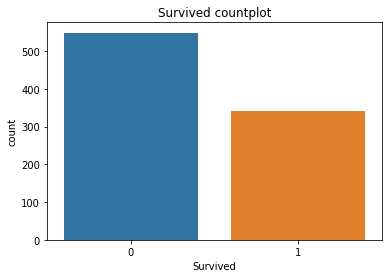

In [7]:
sns.countplot(train['Survived'])
plt.title('Survived countplot')
plt.show()

In the above chart you can see the problem of imbalanced classes.

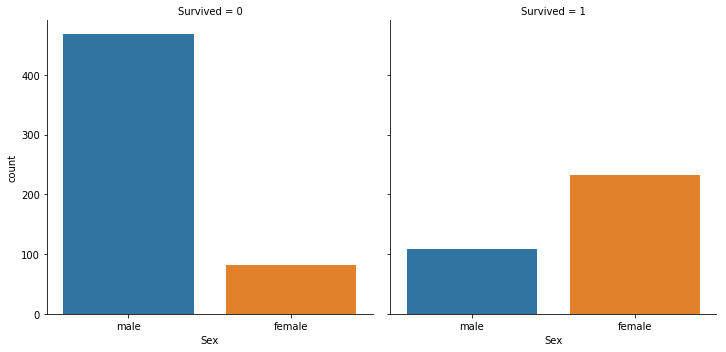

In [8]:
sns.factorplot(x='Sex', col='Survived', kind='count', data=train)
plt.show()

The chart shows that more women than men survived the Titanic's disaster.

## Pclass

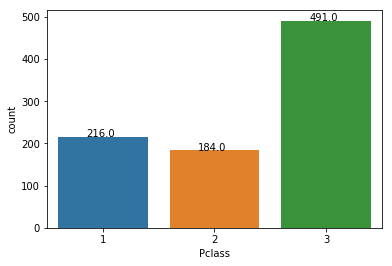

In [9]:
ax = sns.countplot(train['Pclass'])
for patch in ax.patches:
    ax.annotate('{:.1f}'.format(patch.get_height()), (patch.get_x()+0.25, patch.get_height()))

Most passengers were from the third class, then from the first and the second class.

## Pclass and sex

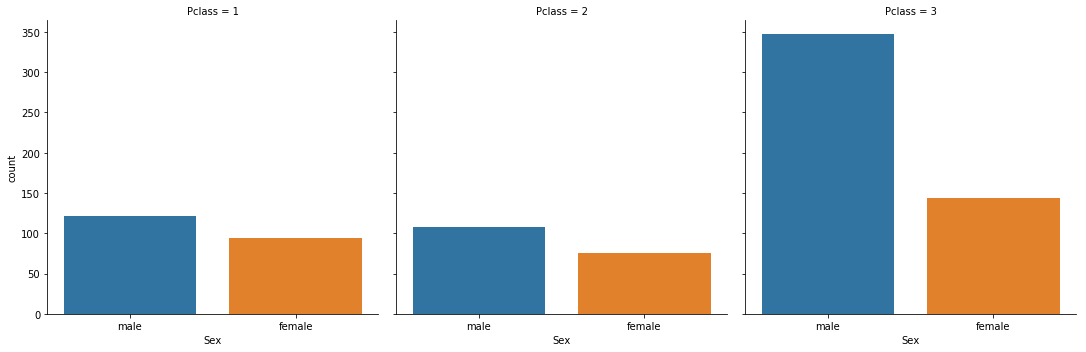

In [10]:
sns.factorplot(x='Sex', col='Pclass', kind='count', data=train);

More men traveled in each class. <br>
The greatest variation among travelers in terms of the number of people by sex is in class 3. <br>

In [11]:
train.groupby(['Pclass','Sex'])['Survived'].count()

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Survived, dtype: int64

## Pclass and Survived

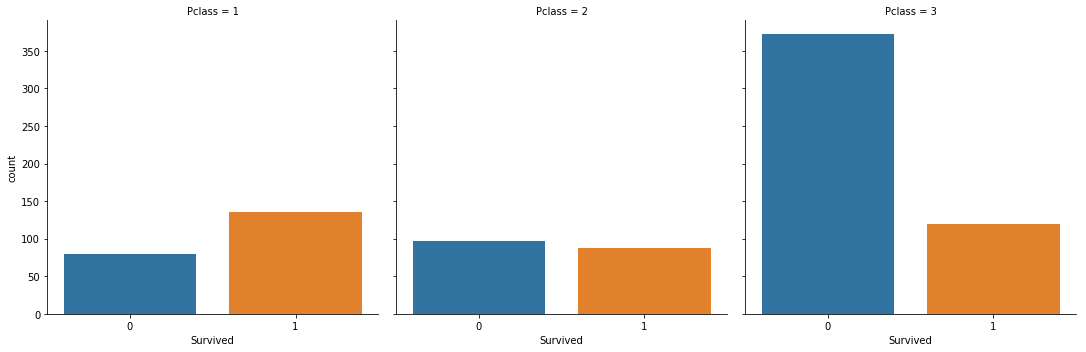

In [12]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=train)
plt.show()

## Name

The variable Name contains the name of the passenger and his titular prefix. <br>
Names and surnames do not contribute anything to the analysis, while prefixes may carry some information.

In [13]:
# Extract title from Name column
train['Title'] = train['Name'].str.extract(r'(\w+\.)', expand=True)
# Replace '.' from Title column
train['Title'] = train['Title'].str.replace(".", "")

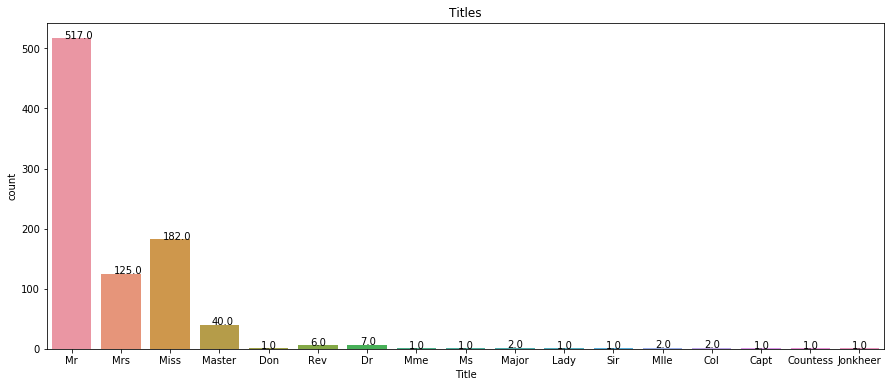

In [14]:
plt.figure(figsize=(15,6))
ax = sns.countplot(train['Title'])
for patch in ax.patches:
    ax.annotate('{:.1f}'.format(patch.get_height()), (patch.get_x()+0.25, patch.get_height()))
plt.title('Titles');

Mr - honorific, english 1
Mrs - honorific, english 1
Miss - honorific, english 1
Master - honorific, english 1
Don - honorific, spain 2
Rev - honorific, catholic, english 1
Dr - science 0
Mme - honorific, france 3
Ms - honorific, unmarried woman, english 1
    Major - crew, army, english 1
Lady - honorific, english 1
Sir - honorific, english 1
Mlle - honorific, france 3
    Col - crew, army, english 1
    Capt - crew, army, english 1
Countess - honorific, english 1
Jonkheer - honorific, france 3

In [15]:
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 
  
# Create the dictionary 
origin_dict ={'Dr' : 0, 'Don' : 2, 'Mlle' : 3, 'Jonkheer': 3, 'Mme':3, 
              'Mr':1, 'Mrs':1, 'Miss':1, 'Master':1, 'Rev':1, 'Ms':1, 'Lady':1, 
              'Sir':1, 'Col':1, 'Capt':1, 'Countess':1, 'Major':1} 
  
# Add a new column named 'origin' 
train['origin'] = train['Title'].apply(set_value, args =(origin_dict, )) 

In [16]:
# Create variable crew which holds information if person was from crew or not
train['crew'] = train['Title'].apply(lambda x: 1 if (x == 'Major' or x == 'Col' or x == 'Capt') else 0)

In [17]:
train = train.drop('Name', axis=1)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
# Encode Title variable
le = LabelEncoder()
train['Title'] = le.fit_transform(train['Title'])

## Sex

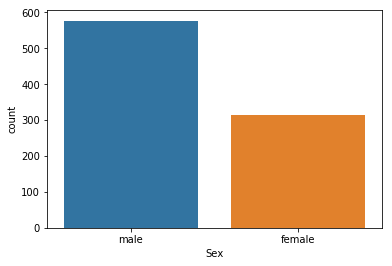

In [20]:
sns.countplot(train['Sex']);

Sex variable is a categorical type. <br>
it has to be changed into a numeric np using the map function changing the value 'female' to 1, and 'male' to 0.

In [21]:
# Encode Sex variable
train['Sex'] = train['Sex'].map({'female':1 , 'male':0})

## Age

In [22]:
# 'Age' empty values
train['Age'].isnull().sum()

177

In [23]:
# age_df contains non-null Age variable
age_df = train['Age'].dropna()

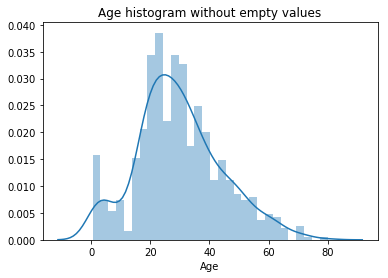

In [24]:
sns.distplot(age_df, kde=True, bins=30)
plt.title('Age histogram without empty values')
plt.show()

## Boxplot

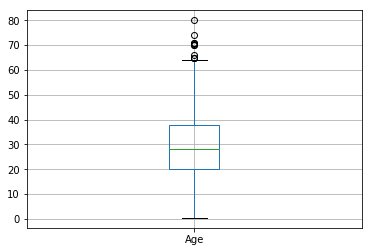

In [25]:
age_boxplot = train.boxplot(column=['Age'])

Percent of empty values:

In [26]:
round( float( train['Age'].isnull().sum() / len(train['Age']) * 100 ), 2)

19.87

Almost 20% of Age variable is empty. Empty values can be filled by mean value of variable:

In [27]:
# age_mean contains mean value of non-null Age variable
age_mean = round(age_df.mean(), 0)
age_mean

30.0

In [28]:
train['Age'] = train['Age'].fillna(age_mean) 

## SibSp

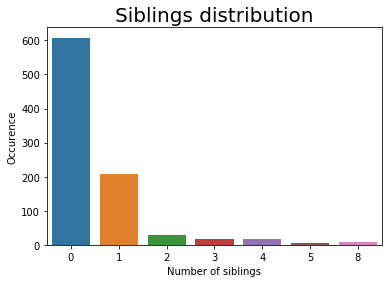

In [29]:
sns.countplot(train['SibSp'])
plt.title('Siblings distribution', fontsize=20)
plt.xlabel('Number of siblings')
plt.ylabel('Occurence')
plt.show()

In [30]:
# Cumulative sum of SibSp variable
np.cumsum(train['SibSp'].value_counts() / train['SibSp'].value_counts().sum() * 100)

0     68.237935
1     91.694725
2     94.837262
4     96.857464
3     98.653199
8     99.438833
5    100.000000
Name: SibSp, dtype: float64

The largest part of passengers were people traveling without siblings and people traveling with one sibling. 

## SibSp and Survived

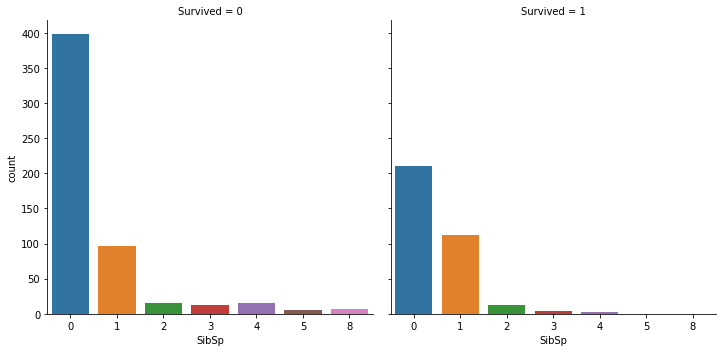

In [31]:
sns.factorplot(x='SibSp', col='Survived', kind='count', data=train)
plt.show()

In [32]:
pd.crosstab(train["Survived"], train['SibSp'])

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


Most people who did not survive the disaster did not have siblings.
Those passengers who had siblings in number of 5 and 8 did not survived.
Comparing survival results, the most people survived with one sibling. 

## SibSp and Pclass

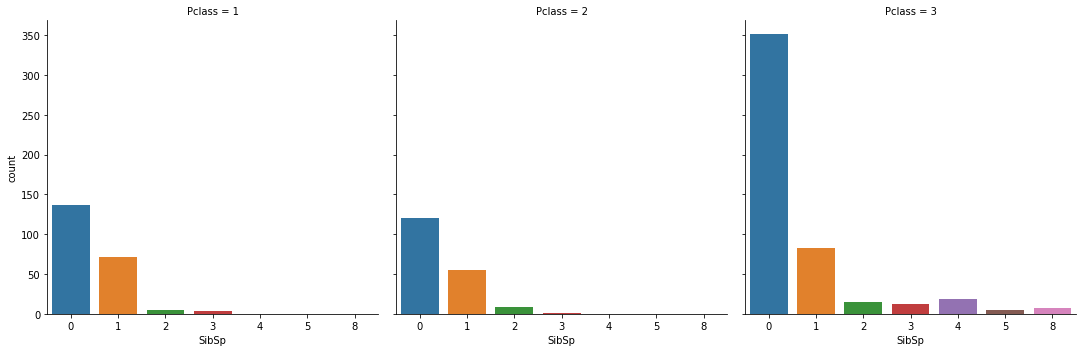

In [33]:
sns.factorplot(x='SibSp', col='Pclass', kind='count', data=train)
plt.show()

Passengers with the largest number of siblings traveled in 3rd class moreover
the percentage of people traveling without siblings is the greatest of all classes. <br>
In the 1st and the 2nd class passengers were traveling with maximum 3 siblings. 

## Parch

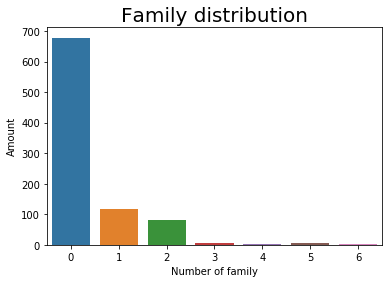

In [34]:
sns.countplot(train['Parch'])
plt.title('Family distribution', fontsize=20)
plt.xlabel('Number of family')
plt.ylabel('Amount')
plt.show()

In [35]:
# Cumulative sum of Parch variable
np.cumsum(train['Parch'].value_counts() / train['Parch'].value_counts().sum() * 100)

0     76.094276
1     89.337823
2     98.316498
5     98.877666
3     99.438833
4     99.887767
6    100.000000
Name: Parch, dtype: float64

The most people traveled alone, almost 76% of all passengers.

## Parch and Survived

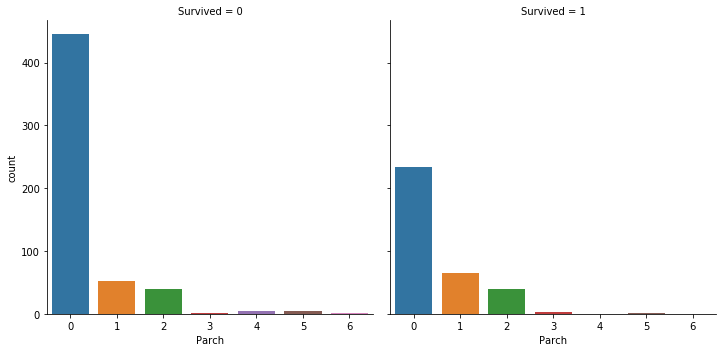

In [36]:
sns.factorplot(x='Parch', col='Survived', kind='count', data=train)
plt.show()

In [37]:
pd.crosstab(train["Survived"], train['Parch'])

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


The largest percentage of people who survived the disaster were alone. <br>
The same can be said for people who did not survive the disaster. <br>
No one who had 4 or 6 people in the family survived the disaster. 

## Parch and Pclass

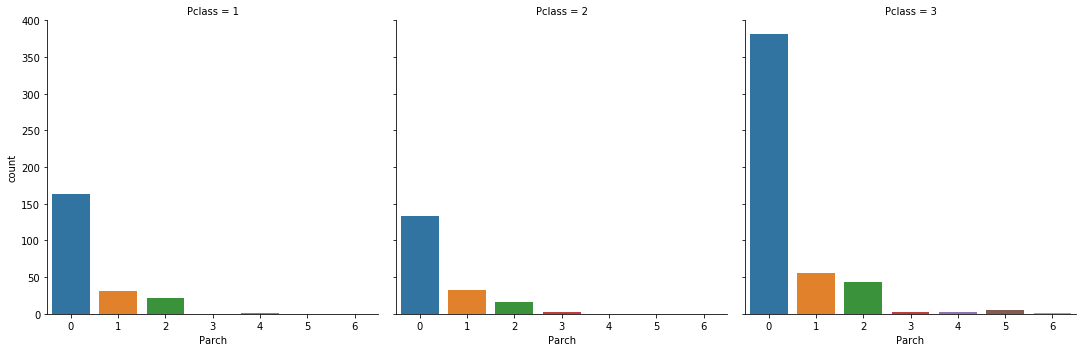

In [38]:
sns.factorplot(x='Parch', col='Pclass', kind='count', data=train)
plt.show()

In [39]:
pd.crosstab(train["Pclass"], train['Parch'])

Parch,0,1,2,3,4,5,6
Pclass,,,,,,,
1,163,31,21,0,1,0,0
2,134,32,16,2,0,0,0
3,381,55,43,3,3,5,1


In [40]:
# SibSp and Parch variables can be join together and obtain the total amount of family
train['total_family'] = train['SibSp'] + train['Parch']

In [41]:
# Drop SibSp and Parch variables
train = train.drop([*['SibSp','Parch']], axis=1)

In [42]:
# Create variable alone to check if the passenger traveled alone
train['alone'] = train['total_family'].where(train['total_family']==1, 0)

In [43]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,origin,crew,total_family,alone
0,0,3,0,22.0,A/5 21171,7.2500,NaN,S,12,1,0,1,1
1,1,1,1,38.0,PC 17599,71.2833,C85,C,13,1,0,1,1
2,1,3,1,26.0,STON/O2. 3101282,7.9250,NaN,S,9,1,0,0,0
3,1,1,1,35.0,113803,53.1000,C123,S,13,1,0,1,1
4,0,3,0,35.0,373450,8.0500,NaN,S,12,1,0,0,0


## Ticket

In [44]:
# Extract ticket's number
train['ticket_no'] = train['Ticket'].str.extract(r'(\d{2,})')

In [45]:
train[train['ticket_no'].isnull()]

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,origin,crew,total_family,alone,ticket_no
179,0,3,0,36.0,LINE,0.0,NaN,S,12,1,0,0,0,NaN
271,1,3,0,25.0,LINE,0.0,NaN,S,12,1,0,0,0,NaN
302,0,3,0,19.0,LINE,0.0,NaN,S,12,1,0,0,0,NaN
597,0,3,0,49.0,LINE,0.0,NaN,S,12,1,0,0,0,NaN
772,0,2,1,57.0,S.O./P.P. 3,10.5,E77,S,13,1,0,0,0,NaN
841,0,2,0,16.0,S.O./P.P. 3,10.5,NaN,S,12,1,0,0,0,NaN


In [46]:
# Fill empty values of ticket_no with '0'
train['ticket_no'] = train['ticket_no'].fillna(0)

In [47]:
# Calculate len of tickets numbes
train['ticket_len'] = train['ticket_no'].str.len()

In [48]:
train[train['ticket_len'].isnull()]

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,origin,crew,total_family,alone,ticket_no,ticket_len
179,0,3,0,36.0,LINE,0.0,NaN,S,12,1,0,0,0,0,NaN
271,1,3,0,25.0,LINE,0.0,NaN,S,12,1,0,0,0,0,NaN
302,0,3,0,19.0,LINE,0.0,NaN,S,12,1,0,0,0,0,NaN
597,0,3,0,49.0,LINE,0.0,NaN,S,12,1,0,0,0,0,NaN
772,0,2,1,57.0,S.O./P.P. 3,10.5,E77,S,13,1,0,0,0,0,NaN
841,0,2,0,16.0,S.O./P.P. 3,10.5,NaN,S,12,1,0,0,0,0,NaN


In [49]:
train['ticket_len'] = train['ticket_len'].fillna(0)

In [50]:
# Get first number of Ticket_no column
train['first_no'] = train['ticket_no'].str[0]

In [51]:
train['first_no'] = train['first_no'].fillna(0)

In [52]:
train[train['ticket_len'].isnull()]

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,origin,crew,total_family,alone,ticket_no,ticket_len,first_no


In [53]:
# Drop Ticket variable
train = train.drop([*['Ticket','ticket_no']], axis=1)

## Fare

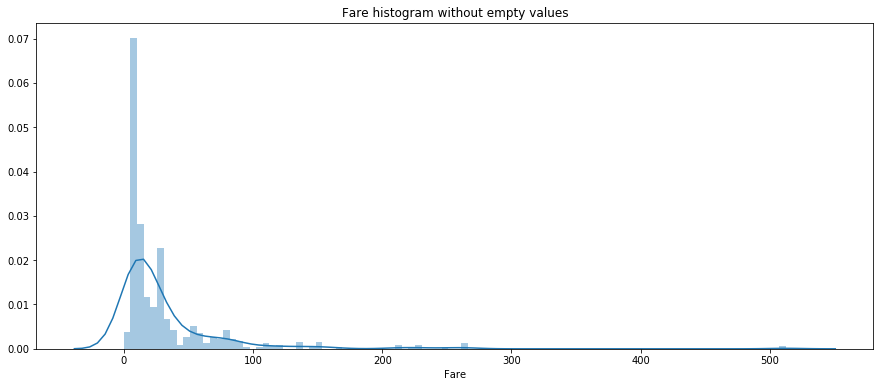

In [54]:
plt.figure(figsize=(15,6))
sns.distplot(train['Fare'], kde=True, bins=100)
plt.title('Fare histogram without empty values')
plt.show()

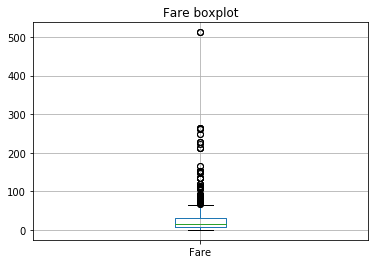

In [55]:
train[['Fare']].boxplot()
plt.title('Fare boxplot');

Text(0.5,1,'Fare quartilies')

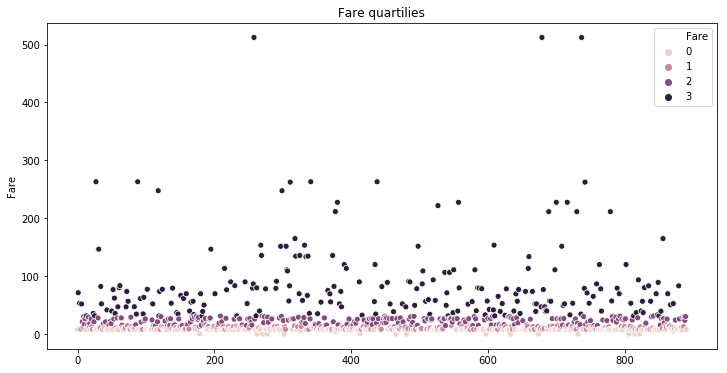

In [56]:
q = pd.qcut(train['Fare'], 4 , labels=False)
plt.figure(figsize=(12,6))
sns.scatterplot(x=train.Fare.index, y=train['Fare'], hue=q)
plt.title('Fare quartilies')

## Cabin

The cabin variable can be used to extract the cab designation in the form of a letter. <br>
In addition, the number of occupying cabins by passengers.

In [57]:
# Extract letter of cabin
train['cabin_letter'] = train['Cabin'].str.extract(r'(^[\w+])')

In [58]:
# Replace NaN with letter U - Unknown
train['cabin_letter'] = train['cabin_letter'].fillna('U')

In [59]:
# Count the number of occupied cabins, 0 is equal to NaN
train['cabin_amount'] = train['Cabin'].str.split(expand=True).count(axis=1)

In [60]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,origin,crew,total_family,alone,ticket_len,first_no,cabin_letter,cabin_amount
0,0,3,0,22.0,7.2500,NaN,S,12,1,0,1,1,5.0,2,U,0
1,1,1,1,38.0,71.2833,C85,C,13,1,0,1,1,5.0,1,C,1
2,1,3,1,26.0,7.9250,NaN,S,9,1,0,0,0,7.0,3,U,0
3,1,1,1,35.0,53.1000,C123,S,13,1,0,1,1,6.0,1,C,1
4,0,3,0,35.0,8.0500,NaN,S,12,1,0,0,0,6.0,3,U,0


In [61]:
# Drop Cabin variable
train = train.drop('Cabin', axis=1)

In [62]:
train['cabin_letter'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_letter, dtype: int64

In [63]:
# Encode cabin_letter
train['cabin_letter'] = train['cabin_letter'].map({
    'U':0, 'C':1, 'B':2, 'D':3, 'E':4, 'A':5, 'F':6, 'G':7, 'T':8
})

In [64]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,origin,crew,total_family,alone,ticket_len,first_no,cabin_letter,cabin_amount
0,0,3,0,22.0,7.2500,S,12,1,0,1,1,5.0,2,0,0
1,1,1,1,38.0,71.2833,C,13,1,0,1,1,5.0,1,1,1
2,1,3,1,26.0,7.9250,S,9,1,0,0,0,7.0,3,0,0
3,1,1,1,35.0,53.1000,S,13,1,0,1,1,6.0,1,1,1
4,0,3,0,35.0,8.0500,S,12,1,0,0,0,6.0,3,0,0


## Embarked

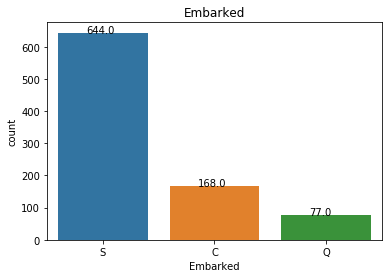

In [65]:
ax = sns.countplot(train['Embarked'])
for patch in ax.patches:
    ax.annotate('{:.1f}'.format(patch.get_height()), (patch.get_x()+0.25, patch.get_height()))
plt.title('Embarked');

## Embarked and Sex

In [66]:
pd.crosstab(train['Embarked'], train['Sex'])

Sex,0,1
Embarked,,
C,95,73
Q,41,36
S,441,203


female - 1, male - 0 <br>

## Embarked and Pclass

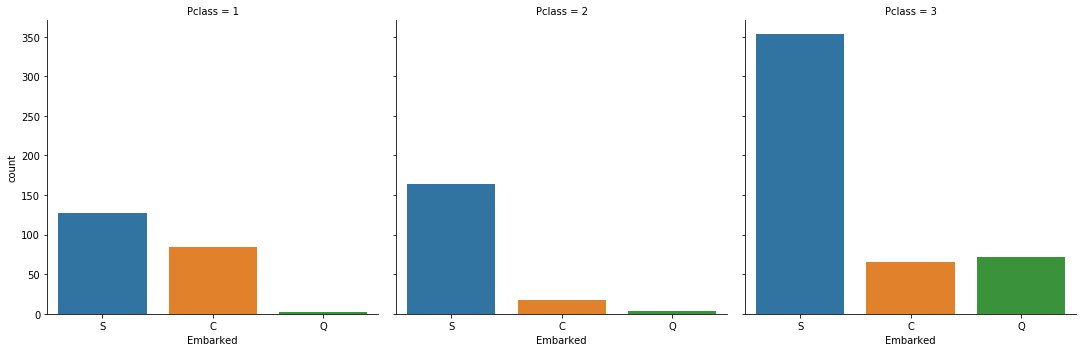

In [67]:
sns.factorplot(x='Embarked', col='Pclass', kind='count', data=train);

In each class the most people came from Southampton. The chart also shows that the most people were traveling in the third class.


## Embarked and Survived variables

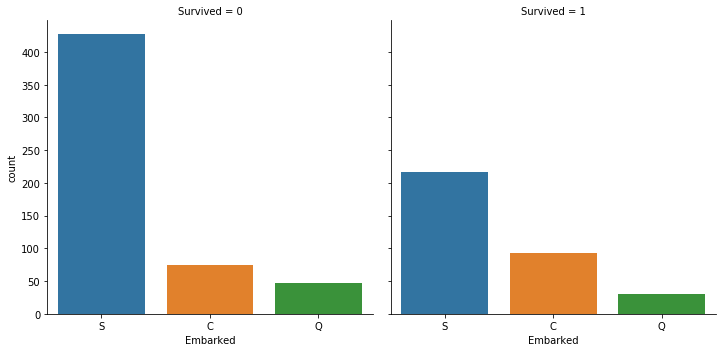

In [68]:
sns.factorplot(x='Embarked', col='Survived', kind='count', data=train);

Most survivors came from the city of Southampton. The same can be said about people who did not survive. <br>
The least number of people came from Queenstown.

In [69]:
# Count empty values of Embarked
train['Embarked'].isnull().sum()

2

In [70]:
# Fill empty valeus with most common value
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [71]:
train['Embarked'] = train['Embarked'].fillna('S')

In [72]:
# Encode Embarked variable
train['Embarked'] = train['Embarked'].map({'S':1, 'C':2, 'Q':3})

Check again empty values

In [73]:
train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
Fare            0
Embarked        0
Title           0
origin          0
crew            0
total_family    0
alone           0
ticket_len      0
first_no        0
cabin_letter    0
cabin_amount    0
dtype: int64

## Save modified train dataset

In [74]:
train.to_csv('modified_train_set.csv', index=False)

# Models

In [75]:
y = train['Survived']
train = train.drop('Survived', axis=1)

In [76]:
def plot_results(y_val, scores, title):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, scores)
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
    plt.title(title + ' ROC')

    plt.subplot(122)
    conf_mat = confusion_matrix(y_val, scores > 0.5)
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu')
    
    roc_score = roc_auc_score(y_val, scores)
    acc_score = accuracy_score(y_val, scores > 0.5)
    return roc_score, acc_score

# Logistic Regression

In [77]:
logistic_params = {
            'Logistic_regression__penalty':['l1','l2'],
            'Logistic_regression__C': [10, 1, 0.1, 0.01],
            'Logistic_regression__random_state':[42],
            'Logistic_regression__class_weight': ['balanced']
}

pipe = Pipeline([            
                 ('Logistic_regression', LogisticRegression())
                ])

logistic_grid = GridSearchCV(pipe , logistic_params, cv=StratifiedKFold(5), refit=True)
logistic_model = logistic_grid.fit(train, y)

In [78]:
logistic_best_params = logistic_model.best_params_
print(logistic_best_params)
logistic_best_estimator = logistic_model.best_estimator_
print(logistic_best_estimator)

{'Logistic_regression__C': 0.1, 'Logistic_regression__class_weight': 'balanced', 'Logistic_regression__penalty': 'l2', 'Logistic_regression__random_state': 42}
Pipeline(memory=None,
     steps=[('Logistic_regression', LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])


In [79]:
log_pred_train_proba = logistic_best_estimator.predict_proba(train)
log_scores = log_pred_train_proba[:,1]

(0.8610711660754802, 0.8002244668911336)

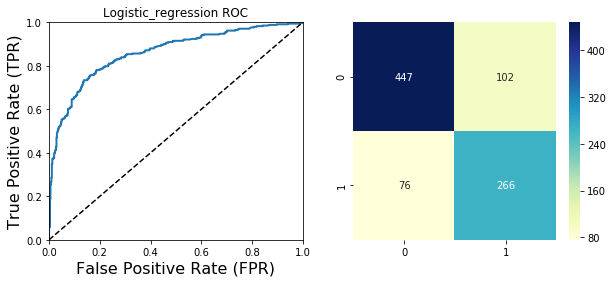

In [80]:
log_roc_score, log_acc_score = plot_results(y, log_scores, 'Logistic_regression')
log_roc_score, log_acc_score

# Decision Tree Classifier

In [81]:
dtc_params = {
    'DecisionTreeClassifier__max_depth': range(2, 10),
    'DecisionTreeClassifier__max_features': ['auto','sqrt','log2'],
    'DecisionTreeClassifier__random_state': [42],
    'DecisionTreeClassifier__class_weight': ['balanced']
}

pipe = Pipeline([            
                 ('DecisionTreeClassifier', DecisionTreeClassifier())
                ])

dtc_grid = GridSearchCV(pipe , dtc_params, cv=StratifiedKFold(5), refit=True)
dtc_model = dtc_grid.fit(train, y)

In [82]:
dtc_best_params = dtc_model.best_params_
print(dtc_best_params)
dtc_best_estimator = dtc_model.best_estimator_
print(dtc_best_estimator)

{'DecisionTreeClassifier__class_weight': 'balanced', 'DecisionTreeClassifier__max_depth': 7, 'DecisionTreeClassifier__max_features': 'auto', 'DecisionTreeClassifier__random_state': 42}
Pipeline(memory=None,
     steps=[('DecisionTreeClassifier', DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=7,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'))])


In [83]:
dtc_pred_train_proba = dtc_best_estimator.predict_proba(train)
dtc_scores = dtc_pred_train_proba[:,1]

(0.9006114253453914, 0.8249158249158249)

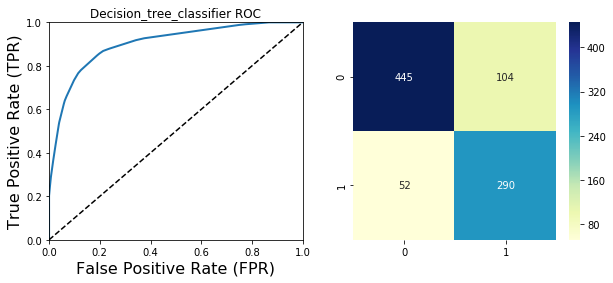

In [84]:
dtc_roc_score, dtc_acc_score = plot_results(y, dtc_scores, 'Decision_tree_classifier')
dtc_roc_score, dtc_acc_score

# SVC

In [85]:
svc_params = {
    'SVC__C': [0.01, 0.1, 1, 10],
    'SVC__class_weight': ['balanced'],
    'SVC__verbose': [True],
    'SVC__random_state': [42],
    'SVC__probability': [True]
}

pipe = Pipeline([            
                 ('SVC', SVC())
                ])

svc_grid = GridSearchCV(pipe , svc_params, cv=StratifiedKFold(5), refit=True)
svc_model = svc_grid.fit(train, y)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

C:\Users\PIT\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [86]:
svc_best_params = svc_model.best_params_
print(svc_best_params)
svc_best_estimator = svc_model.best_estimator_
print(svc_best_estimator)

{'SVC__C': 10, 'SVC__class_weight': 'balanced', 'SVC__probability': True, 'SVC__random_state': 42, 'SVC__verbose': True}
Pipeline(memory=None,
     steps=[('SVC', SVC(C=10, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=42,
  shrinking=True, tol=0.001, verbose=True))])


In [87]:
svc_pred_train_proba = svc_best_estimator.predict_proba(train)
svc_scores = dtc_pred_train_proba[:,1]

(0.9006114253453914, 0.8249158249158249)

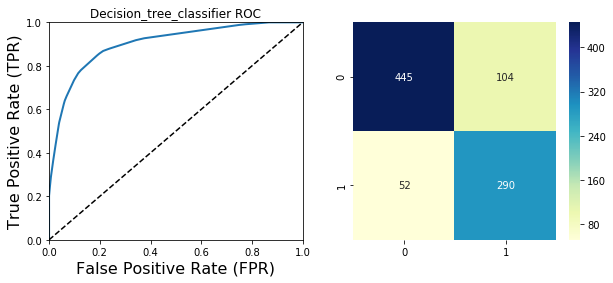

In [88]:
svc_roc_score, svc_acc_score = plot_results(y, svc_scores, 'Decision_tree_classifier')
svc_roc_score, svc_acc_score

# Random Forest Classifier

In [89]:
rfc_params = {
    'RandomForestClassifier__n_estimators': [400, 450, 500],
    'RandomForestClassifier__max_depth': [2,6,8],
    'RandomForestClassifier__max_features': ['auto','sqrt','log2'],
    'RandomForestClassifier__bootstrap': [True],
    #'RandomForestClassifier__random_state': [42],
    'RandomForestClassifier__warm_start': [True],
    'RandomForestClassifier__class_weight': ['balanced']
}

pipe = Pipeline([            
                 ('RandomForestClassifier', RandomForestClassifier())
                ])

rfc_grid = GridSearchCV(pipe , rfc_params, cv=StratifiedKFold(5), refit=True)
rfc_model = rfc_grid.fit(train, y)

In [90]:
rfc_best_params = rfc_model.best_params_
print(rfc_best_params)
rfc_best_estimator = rfc_model.best_estimator_
print(rfc_best_estimator)

{'RandomForestClassifier__bootstrap': True, 'RandomForestClassifier__class_weight': 'balanced', 'RandomForestClassifier__max_depth': 8, 'RandomForestClassifier__max_features': 'sqrt', 'RandomForestClassifier__n_estimators': 450, 'RandomForestClassifier__warm_start': True}
Pipeline(memory=None,
     steps=[('RandomForestClassifier', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=8, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=450, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=True))])


In [91]:
rfc_pred_train_proba = rfc_best_estimator.predict_proba(train)
rfc_scores = rfc_pred_train_proba[:,1]

(0.9670107265735679, 0.9158249158249159)

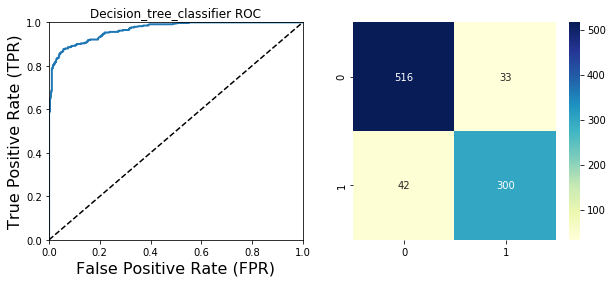

In [92]:
rfc_roc_score, rfc_acc_score = plot_results(y, rfc_scores, 'Decision_tree_classifier')
rfc_roc_score, rfc_acc_score

# Ada Boost Classifier

In [93]:
ada_params = {
    'AdaBoostClassifier__base_estimator': [DecisionTreeClassifier()],
    'AdaBoostClassifier__n_estimators': [200, 300],
    'AdaBoostClassifier__learning_rate': [0.2, 0.5, 0.9],
    'AdaBoostClassifier__random_state': [42]
}

pipe = Pipeline([            
                 ('AdaBoostClassifier', AdaBoostClassifier())
                ])

ada_grid = GridSearchCV(pipe , ada_params, cv=StratifiedKFold(5), refit=True)
ada_model = ada_grid.fit(train, y)

In [94]:
ada_best_params = ada_model.best_params_
print(ada_best_params)
ada_best_estimator = ada_model.best_estimator_
print(ada_best_estimator)

{'AdaBoostClassifier__base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 'AdaBoostClassifier__learning_rate': 0.2, 'AdaBoostClassifier__n_estimators': 200, 'AdaBoostClassifier__random_state': 42}
Pipeline(memory=None,
     steps=[('AdaBoostClassifier', AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            m...one,
            splitter='best'),
          learning_rate=0.2, n_estimators=200, random_state=42))])


In [95]:
ada_pred_train_proba = ada_best_estimator.predict_proba(train)
ada_scores = ada_pred_train_proba[:,1]

(0.999632505672195, 0.9887766554433222)

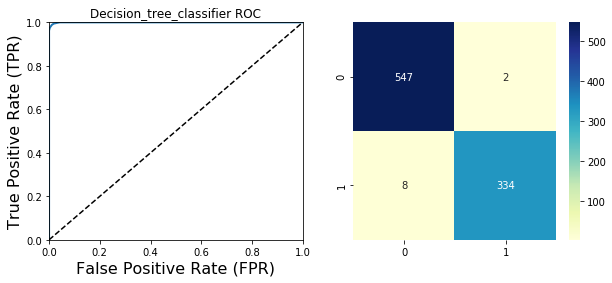

In [96]:
ada_roc_score, ada_acc_score = plot_results(y, ada_scores, 'Decision_tree_classifier')
ada_roc_score, ada_acc_score

# Train results

In [97]:
data = {
    'model': ['logistic_regression', 'decision_tree_classifier', 'svc', 'random_forest_classifier', 'AdaBoostClassifier'],
    'roc_score': [log_roc_score, dtc_roc_score, svc_roc_score, rfc_roc_score, ada_roc_score], 
    'acc_score': [log_acc_score, dtc_acc_score, svc_acc_score, rfc_acc_score, ada_acc_score]
}
df = pd.DataFrame(data=data)
df.sort_values(['acc_score'], ascending=False)

,model,roc_score,acc_score
4,AdaBoostClassifier,0.999633,0.988777
3,random_forest_classifier,0.967011,0.915825
1,decision_tree_classifier,0.900611,0.824916
2,svc,0.900611,0.824916
0,logistic_regression,0.861071,0.800224


# TEST SET

In [98]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [99]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Name

In [100]:
# Extract title from Name column
test['Title'] = test['Name'].str.extract(r'(\w+\.)', expand=True)
# Replace '.' from Title column
test['Title'] = test['Title'].str.replace(".", "")

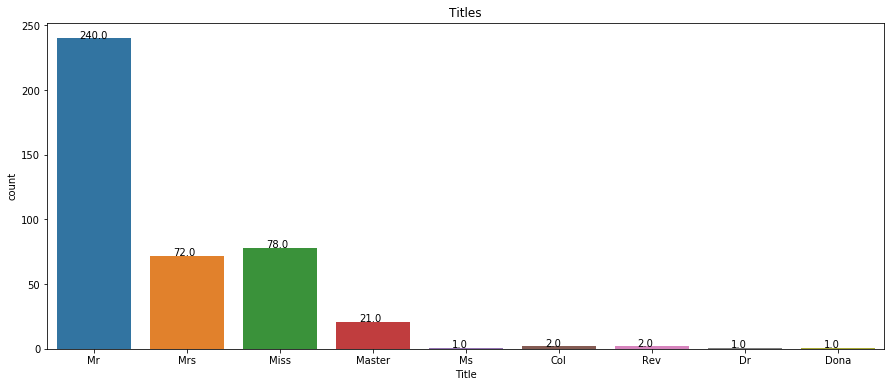

In [101]:
plt.figure(figsize=(15,6))
ax = sns.countplot(test['Title'])
for patch in ax.patches:
    ax.annotate('{:.1f}'.format(patch.get_height()), (patch.get_x()+0.25, patch.get_height()))
plt.title('Titles');

In [102]:
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 
  
# Create the dictionary 
origin_dict ={'Dr' : 0, 'Don':2, 'Dona' : 2, 'Mlle' : 3, 'Jonkheer': 3, 'Mme':3, 
              'Mr':1, 'Mrs':1, 'Miss':1, 'Master':1, 'Rev':1, 'Ms':1, 'Lady':1, 
              'Sir':1, 'Col':1, 'Capt':1, 'Countess':1, 'Major':1} 

# Add a new column named 'Price' 
test['origin'] = test['Title'].apply(set_value, args =(origin_dict, )) 

In [103]:
# Create variable crew which holds information if person was from crew or not
test['crew'] = test['Title'].apply(lambda x: 1 if (x == 'Major' or x == 'Col' or x == 'Capt') else 0)

In [104]:
test = test.drop('Name', axis=1)

In [105]:
test['Title'] = le.fit_transform(test['Title'])

## Sex

In [106]:
# Encode Sex variable
test['Sex'] = test['Sex'].map({'female':1 , 'male':0})

## Age

In [107]:
# age_df contains non-null Age variable
age_df_test = test['Age'].dropna()

In [108]:
# age_mean contains mean value of non-null Age variable
age_mean_test = round(age_df_test.mean(), 0)
age_mean_test

30.0

In [109]:
test['Age'] = test['Age'].fillna(age_mean_test) 

## SibSp and Parch

In [110]:
test['total_family'] = test['SibSp'] + test['Parch']

In [111]:
# Drop SibSp and Parch variables
test = test.drop([*['SibSp','Parch']], axis=1)
# Create variable alone to check if the passenger traveled alone
test['alone'] = test['total_family'].where(test['total_family']==1, 0)

## Ticket

In [112]:
# Extract ticket's number
test['ticket_no'] = test['Ticket'].str.extract(r'(\d{2,})')

In [113]:
# Fill empty values of ticket_no with '0'
test['ticket_no'] = test['ticket_no'].fillna(0)

In [114]:
# Calculate len of tickets numbes and fill empty values with 0
test['ticket_len'] = test['ticket_no'].str.len().fillna(0)

In [115]:
# Get first number of Ticket_no columnand fill empty values with 0
test['first_no'] = test['ticket_no'].str[0].fillna(0)

In [116]:
# Drop Ticket variable
test = test.drop([*['Ticket','ticket_no']], axis=1)

## Fare

In [117]:
# Fill empty values with mean
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

## Cabin

In [118]:
# Extract letter of cabin
test['cabin_letter'] = test['Cabin'].str.extract(r'(^[\w+])')

In [119]:
# Replace NaN with letter U - Unknown
test['cabin_letter'] = test['cabin_letter'].fillna('U')

In [120]:
# Count the number of occupied cabins, 0 is equal to NaN
test['cabin_amount'] = test['Cabin'].str.split(expand=True).count(axis=1)

In [121]:
# Drop Cabin variable
test = test.drop('Cabin', axis=1)

In [122]:
# Encode cabin_letter
test['cabin_letter'] = le.fit_transform(test['cabin_letter'])

## Embarked

In [123]:
test['Embarked'] = test['Embarked'].map({'S':1, 'C':2, 'Q':3})

Drop PassengerId

In [124]:
test_pass_id = test['PassengerId']

In [125]:
test = test.drop('PassengerId', axis=1)

Check again empty values

In [126]:
test.isnull().sum()

Pclass          0
Sex             0
Age             0
Fare            0
Embarked        0
Title           0
origin          0
crew            0
total_family    0
alone           0
ticket_len      0
first_no        0
cabin_letter    0
cabin_amount    0
dtype: int64

## Save modified test dataset

In [127]:
test.to_csv('modified_test_set.csv', index=False)

## Predict test values

In [128]:
best_test_predict_model = ada_best_estimator.predict_proba(test)
test_scores = best_test_predict_model[:,1]

# Save test results

In [129]:
def save_results(test_predictions):
    y_pred_df = pd.DataFrame(test_predictions)
    y_pred_df.columns = ['y_pred']
    y_pred_df['PassengerId'] = test_pass_id
    y_pred_df['Survived'] = (y_pred_df['y_pred'] > 0.5).astype(int)
    y_pred_df.head()
    data = y_pred_df[['PassengerId','Survived']]
    data.to_csv('test_titanic_results.csv', index=False)

In [130]:
save_results(test_scores)